# THE DATA CONTAINS FOLLOWING FEATURES:

* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the games
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

# ***THINGS YOU HAVE TO FOLLOW WHILE WALKING THROUGH THE WHOLE REPORT***

1. If you are familiar with python then only follow the code. 
2. The simple explanations about any visual or graph will be there.
3. There will be a brief conclusion of the report.
4. Every explanation is presented below the line of code's output.

***Enjoy***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install pywaffle --quiet
from pywaffle import Waffle
from wordcloud import WordCloud

In [2]:
df= pd.read_csv("../input/videogamesales/vgsales.csv")

In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
print("A detailed description of the dataset ")
d = df.describe().T
d

A detailed description of the dataset 


,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [7]:
print('Insights obtained from the dataset are as follows :')
print("1. MEAN NORTH AMERICA SALES =",d.iloc[2,1])
print("1. MEAN EUROPE SALES =",d.iloc[3,1])
print("1. MEAN JAPAN SALES =",d.iloc[4,1])
print("1. MEAN OTHER SALES =",d.iloc[5,1])
print("1. MEAN GLOBAL SALES =",d.iloc[6,1])

Insights obtained from the dataset are as follows :
1. MEAN NORTH AMERICA SALES = 0.26466742981084057
1. MEAN EUROPE SALES = 0.1466520062658483
1. MEAN JAPAN SALES = 0.07778166044101108
1. MEAN OTHER SALES = 0.048063019640913515
1. MEAN GLOBAL SALES = 0.53744065550074


In [8]:
print("Number of games: ", len(df))
publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres =df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
df=df.dropna()
data=df

In [11]:
data_genre = df.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

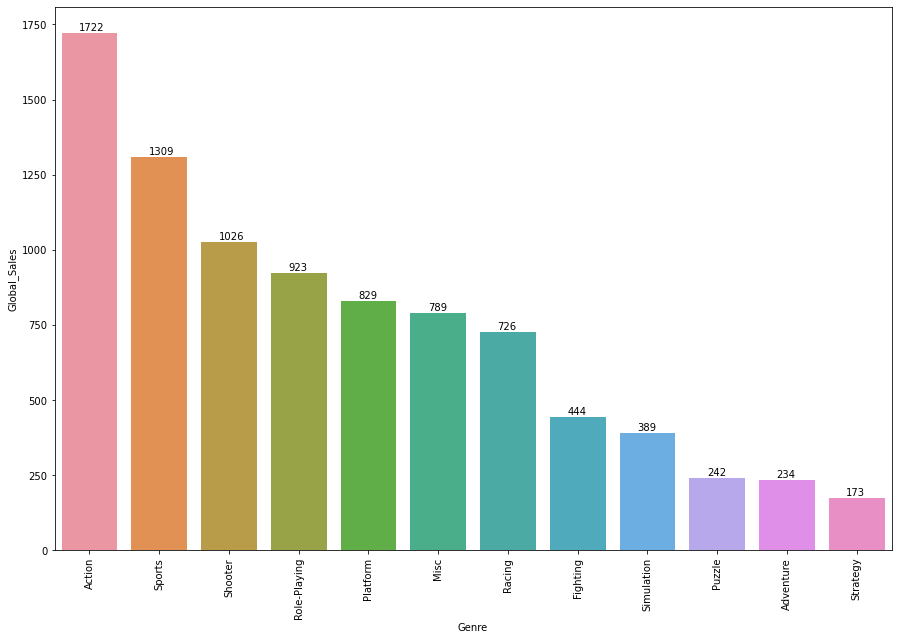

In [12]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

# **==>Action genre have the highest sale price globally.**


In [13]:
publisher = df.loc[:,['Publisher','Global_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['Global_Sales'].transform('sum')
publisher.drop('Global_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.head(10)

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.2,0.1,0.1,0.1,0.1], textinfo="percent+label")
fig.show()

# **==>Nintendo has highest sales**

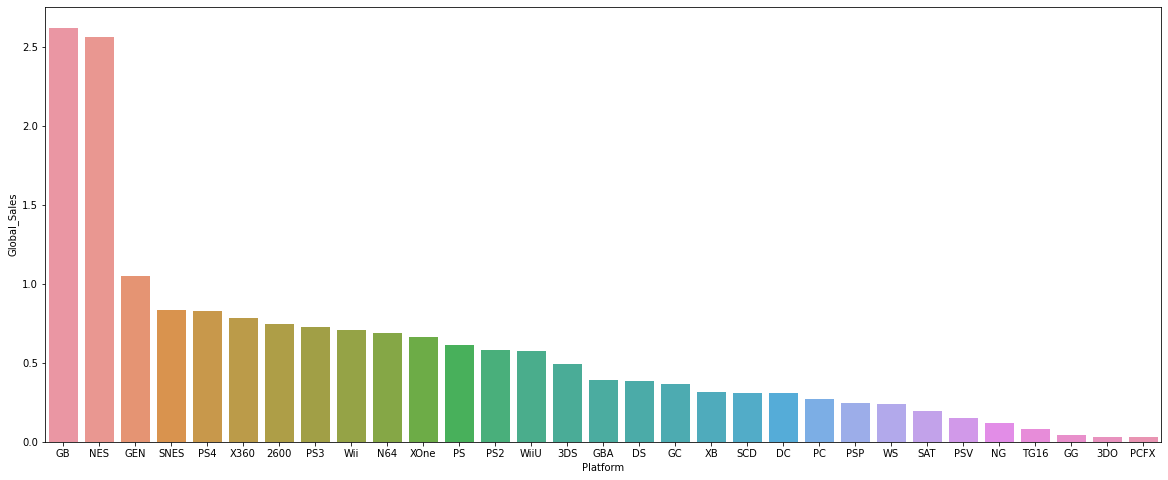

In [14]:
GP=df[["Platform", "Global_Sales"]].groupby(['Platform'], as_index=False).mean().sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(20,8))

sns.barplot(x='Platform', y='Global_Sales', data=GP)

# ==>PLATFORM GB HAS HIGHEST SALES

# Most popular game in North America, Europe, Japan, Globally

In [15]:
game = data.loc[data['Name']!='Wii Sports',['Name','EU_Sales']]
game = game.sort_values('EU_Sales', ascending=False)
game = game.head()

fig = px.pie(game, names='Name', values='EU_Sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# EUROPE ==> Mario Kart wii

In [16]:
game = data.loc[data['Name']!='Wii Sports',['Name','NA_Sales']]
game = game.sort_values('NA_Sales', ascending=False)
game = game.head()

fig = px.pie(game, names='Name', values='NA_Sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# NORTH AMERICA ==> Super Mario Bros.

In [17]:
game = data.loc[data['Name']!='Wii Sports',['Name','JP_Sales']]
game = game.sort_values('JP_Sales', ascending=False)
game = game.head()

fig = px.pie(game, names='Name', values='JP_Sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# JAPAN ==> Pokemon Red/ Pokemon Blue

In [18]:
game = data.loc[data['Name']!='Wii Sports',['Name','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game = game.head()

fig = px.pie(game, names='Name', values='Global_Sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# GLOBALLY ==> Super Mario Bros.

# Most popular platform in North America, Europe, Japan, Globally

In [19]:
platform = data.loc[data['Name']!='Wii Sports',['Platform','NA_Sales']]
platform['total_sales'] = platform.groupby('Platform')['NA_Sales'].transform('sum')
platform.drop('NA_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('total_sales', ascending=False)
platform = platform.head()

fig = px.pie(platform, names='Platform', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# NORTH AMERICA ==> X360

In [20]:
platform = data.loc[data['Name']!='Wii Sports',['Platform','EU_Sales']]
platform['total_sales'] = platform.groupby('Platform')['EU_Sales'].transform('sum')
platform.drop('EU_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('total_sales', ascending=False)
platform = platform.head()

fig = px.pie(platform, names='Platform', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# EUROPE ==> PS3

In [21]:
platform = data.loc[data['Name']!='Wii Sports',['Platform','JP_Sales']]
platform['total_sales'] = platform.groupby('Platform')['JP_Sales'].transform('sum')
platform.drop('JP_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('total_sales', ascending=False)
platform = platform.head()

fig = px.pie(platform, names='Platform', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# JAPAN ==> DS

In [22]:
platform = data.loc[data['Name']!='Wii Sports',['Platform','Global_Sales']]
platform['total_sales'] = platform.groupby('Platform')['Global_Sales'].transform('sum')
platform.drop('Global_Sales', axis=1, inplace=True)
platform = platform.drop_duplicates()
platform = platform.sort_values('total_sales', ascending=False)
platform = platform.head()

fig = px.pie(platform, names='Platform', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# GLOBALLY ==> PS2

# Most popular publisher in North America, Europe, Japan, Globally

In [23]:
publisher = data.loc[data['Name']!='Wii Sports',['Publisher','NA_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['NA_Sales'].transform('sum')
publisher.drop('NA_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values('total_sales', ascending=False)
publisher = publisher.head()

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# NORTH AMERICA ==> NINTENDO

In [24]:
publisher = data.loc[data['Name']!='Wii Sports',['Publisher','EU_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['EU_Sales'].transform('sum')
publisher.drop('EU_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values('total_sales', ascending=False)
publisher = publisher.head()

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# EUROPE ==> NINTENDO

In [25]:
publisher = data.loc[data['Name']!='Wii Sports',['Publisher','JP_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['JP_Sales'].transform('sum')
publisher.drop('JP_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values('total_sales', ascending=False)
publisher = publisher.head()

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# JAPAN ==> NINTENDO

In [26]:
publisher = data.loc[data['Name']!='Wii Sports',['Publisher','Global_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['Global_Sales'].transform('sum')
publisher.drop('Global_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.sort_values('total_sales', ascending=False)
publisher = publisher.head()

fig = px.pie(publisher, names='Publisher', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=0.06, textinfo="percent+label")
fig.show()

# GLOBALLY ==> NINTENDO

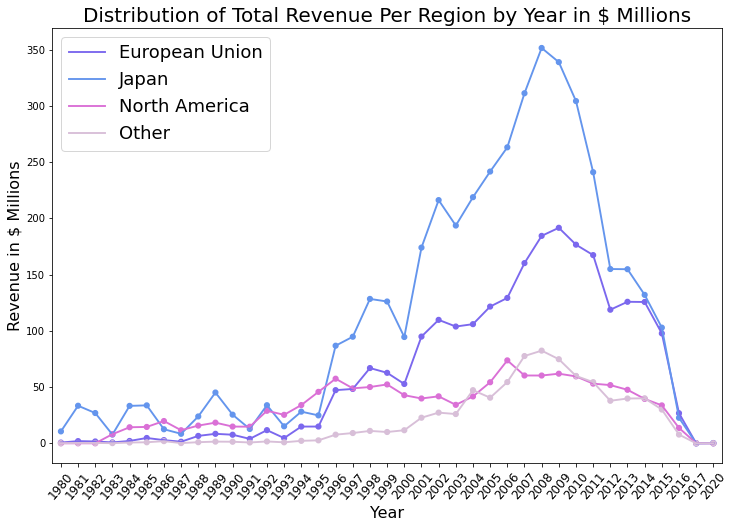

In [27]:
EU = df.pivot_table('EU_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
NA = df.pivot_table('NA_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
JP = df.pivot_table('JP_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
Other = df.pivot_table('Other_Sales', columns='Name', index='Year', aggfunc='sum').sum(axis=1)
years = Other.index.astype(int)
regions = ['European Union','Japan','North America','Other']

plt.figure(figsize=(12,8))
ax = sns.pointplot(x=years, y=EU, color='mediumslateblue', scale=0.7)
ax = sns.pointplot(x=years, y=NA, color='cornflowerblue', scale=0.7)
ax = sns.pointplot(x=years, y=JP, color='orchid', scale=0.7)
ax = sns.pointplot(x=years, y=Other, color='thistle', scale=0.7)
ax.set_xticklabels(labels=years, fontsize=12, rotation=50)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_title(label='Distribution of Total Revenue Per Region by Year in $ Millions', fontsize=20)
ax.legend(handles=ax.lines[::len(years)+1], labels=regions, fontsize=18)
plt.show();

# !!!!Top 20 Publisher!!!!


In [28]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

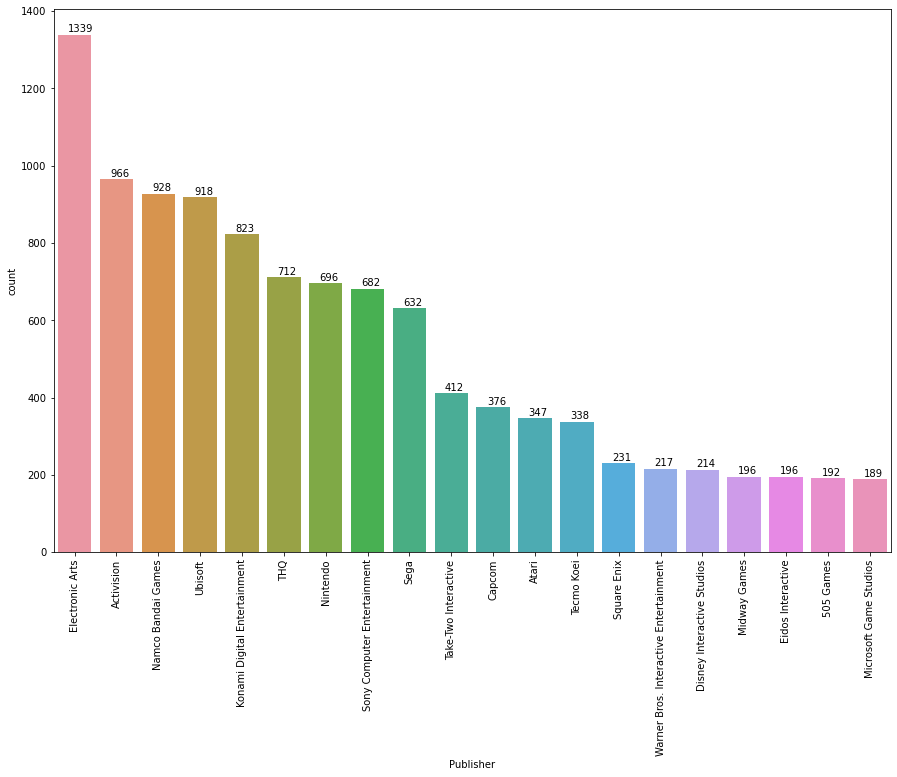

In [29]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

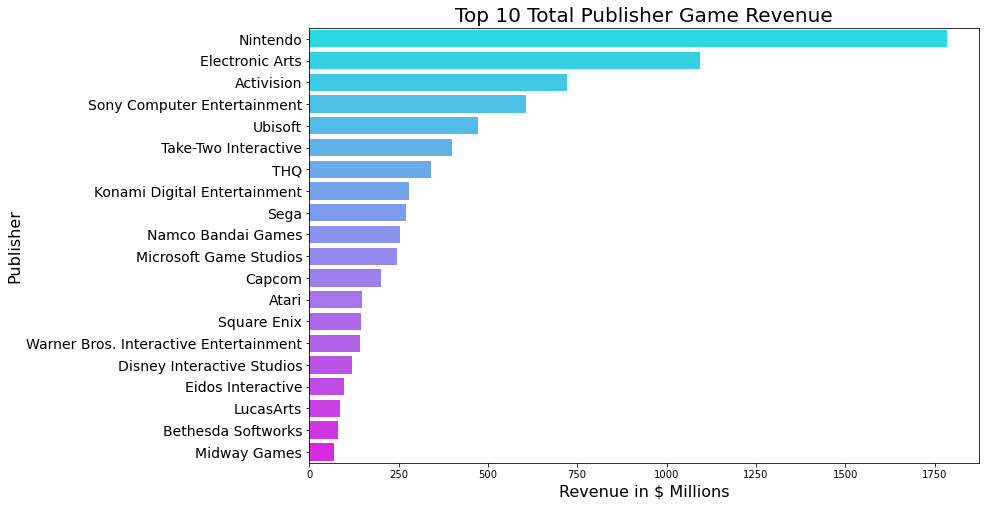

In [30]:
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:20]
publishers = data.index
data.columns = ['Global Sales']

colors = sns.color_palette("cool", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

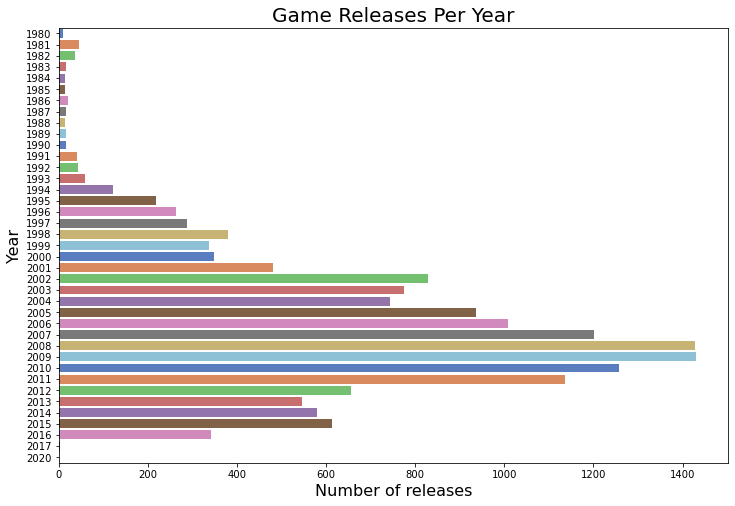

In [31]:
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
ax = sns.barplot(y = y, x = x, orient='h', palette=colors)
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

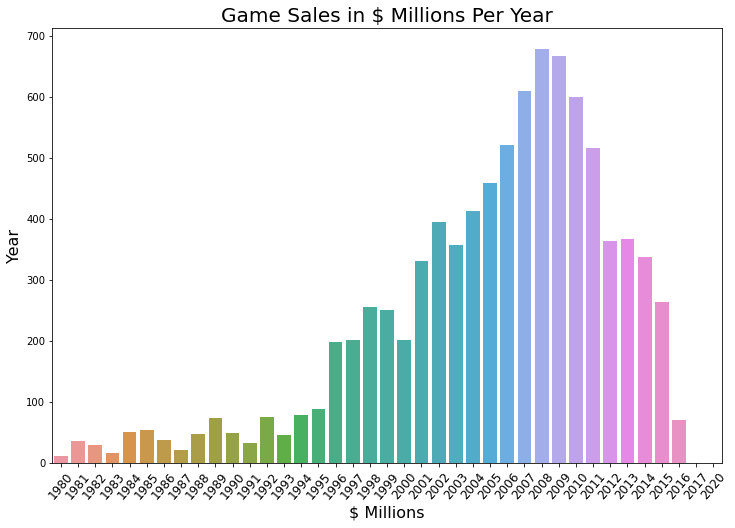

In [32]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='$ Millions', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

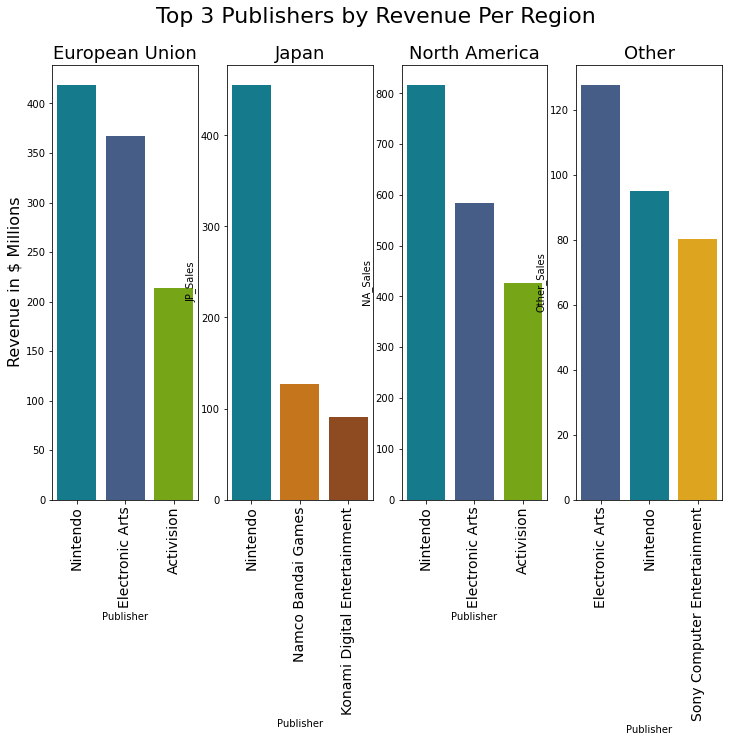

In [33]:
EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["teal blue"], 'Electronic Arts':sns.xkcd_rgb["denim blue"], 'Activision':sns.xkcd_rgb["dark lime green"], 'Namco Bandai Games':sns.xkcd_rgb["pumpkin"], 'Konami Digital Entertainment':sns.xkcd_rgb["burnt umber"], 'Sony Computer Entertainment':sns.xkcd_rgb["yellow orange"]}
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)
plt.ylabel('Revenue in $ Millions', size=16)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

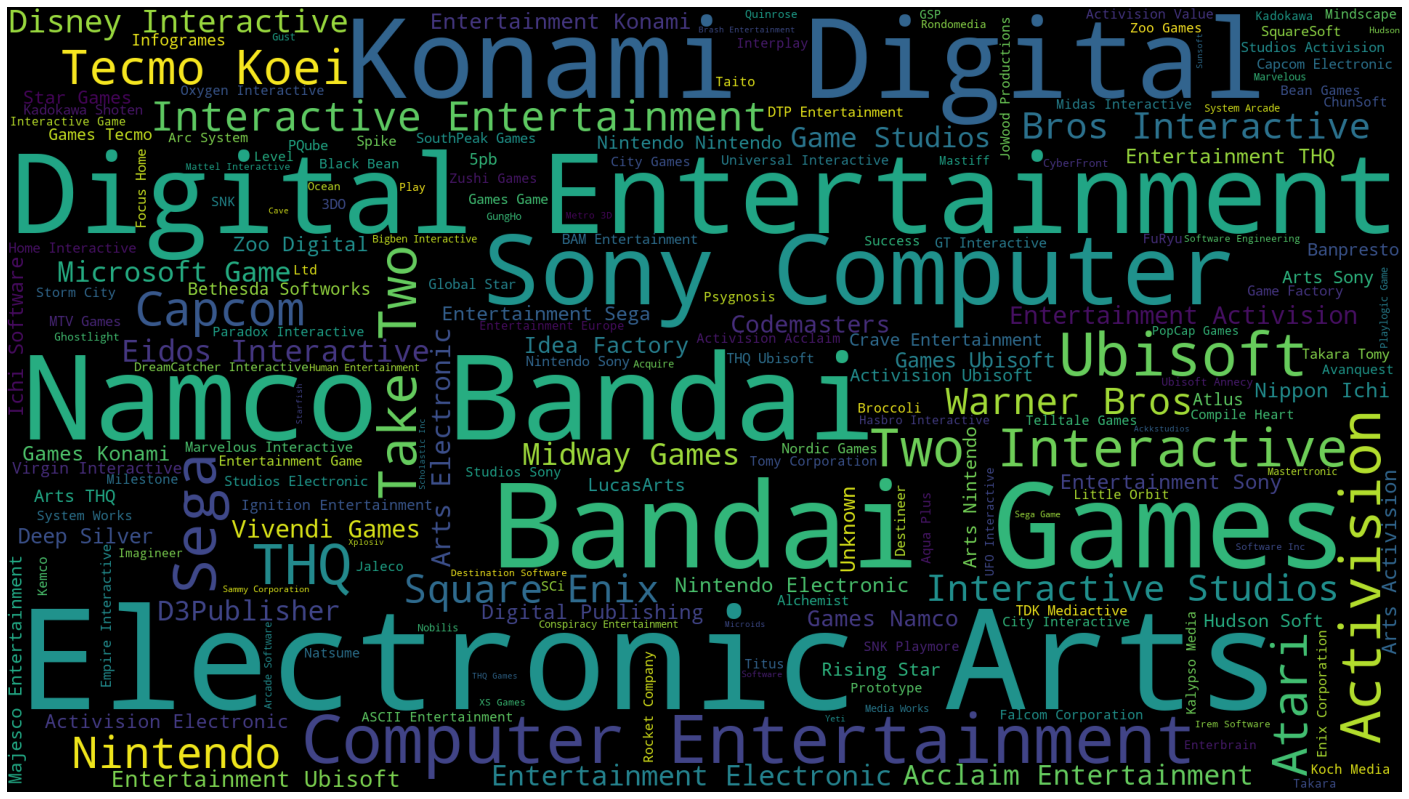

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Publisher))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

# THE END